# <span style="color:darkblue"> Lecture 6: Applications 1 - Simulation Studies </span>

<font size="5"> 

In the previous class we:
- Introduced boolean types and if/else statments
- Introduced a type of structure with indendented code

<font size="5"> 

In this class we will:

- Talk about basic manipulation of lists
- Introduce "For" Loops and examples of key algorithms

## <span style="color:darkblue"> I. Import Libraries </span>

In [2]:
# the "numPy" library is used for mathematical operations
# the "matplotlib" library is for generating graphs
# the "pandas" library is for manipualting datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## <span style="color:darkblue"> II. Visualizing Random Variables </span>

<font size = "5" >

Consider a sample with $n$ observations

$ X = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{pmatrix}.$

<font size = "5" > We can simulate from different distributions

In [3]:
# Set Sample size 
# These produce several common distributions
# A normam with "loc" and standard deviation "5"
# A chi-square with "df" degrees of freedom
# A uniform with values between -3 and 5

n = 10000

vec_normal  = np.random.normal(loc = 7, scale = 5, size = n)
vec_chisqr  = np.random.chisquare(df = 1, size = n)
vec_unif    = np.random.uniform(low = -3,high = 5, size = n)



<font size = "5">

The sample average is defined as 

$ \bar{X} = \frac{1}{n}\sum_i X_i $

In [4]:
# Let's print of each of the above random variables

print(vec_normal.mean())
print(vec_chisqr.mean())
print(vec_unif.mean())

6.953577320256986
1.0002298089064678
0.9983165853750484


<font size = "5" >

Multiple plots in a row (subplot)

- The normal has more of a bell shape
- The uniform is a rectangular shape

Text(291.2335858585858, 0.5, 'Frequency')

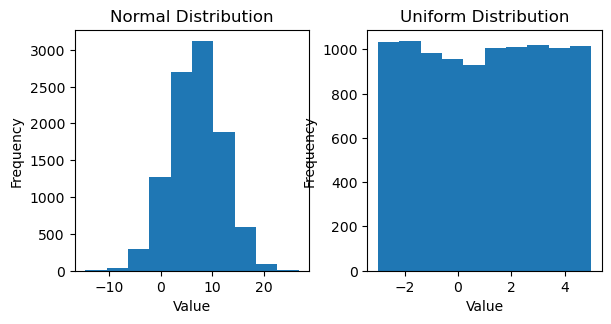

In [5]:
#------------------------ Setting up subplots----------------------------------#
# Create a plot with 1 row, 2 columns
# You will create a list of subfigures "list_subfig"
# You can choose whichever name you like
# The option "figsize" indicates the (width,height)3) of the graph
fig, list_subfig = plt.subplots(1, 2,figsize = (6,3))


# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()

# First Figure
list_subfig[0].hist(x = vec_normal)
list_subfig[0].set_title("Normal Distribution")
list_subfig[0].set_xlabel("Value")
list_subfig[0].set_ylabel("Frequency")

# Second Figure
list_subfig[1].hist(x = vec_unif)
list_subfig[1].set_title("Uniform Distribution")
list_subfig[1].set_xlabel("Value")
list_subfig[1].set_ylabel("Frequency")

# Note:
# Use the set_title() function for the title of subfigures
# Similarly, use "set_xlabel()" and "set_ylabel()"



<font size = "5">

Try it yourself!

- Do a version with three plots in the same row
- What happens if you remove the "plt.tight_layout()" command?
- What happens if you change the "figsize"?

Text(567.4501633986929, 0.5, 'Frequency')

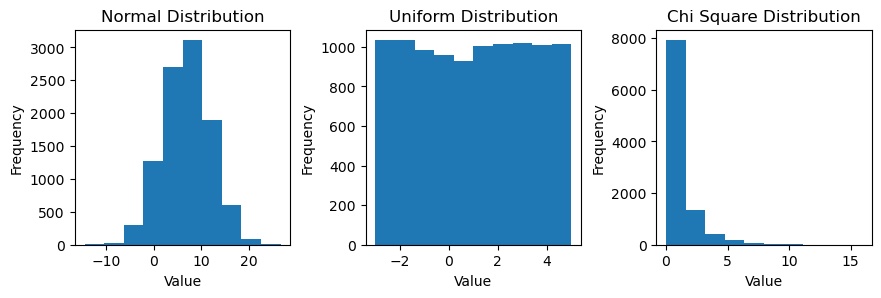

In [6]:
# Write down your solution

fig, list_subfig = plt.subplots(1, 3, figsize = (9,3))

# The tight layout option ensures that the axes are not overlapping
plt.tight_layout(pad = 2)

# First Figure
list_subfig[0].hist(x = vec_normal)
list_subfig[0].set_title("Normal Distribution")
list_subfig[0].set_xlabel("Value")
list_subfig[0].set_ylabel("Frequency")

# Second Figure
list_subfig[1].hist(x = vec_unif)
list_subfig[1].set_title("Uniform Distribution")
list_subfig[1].set_xlabel("Value")
list_subfig[1].set_ylabel("Frequency")

# Third Figure
list_subfig[2].hist(x = vec_chisqr)
list_subfig[2].set_title("Chi Square Distribution")
list_subfig[2].set_xlabel("Value")
list_subfig[2].set_ylabel("Frequency")

## <span style="color:darkblue"> III. Singe Loops </span>

<font size = "5">

Simple sequences: $[0,1,2,...,n-1]$

In [ ]:
# Use "list(range(n))" to create a list from 0 to (n-1).

n= 10
list_zero_ten = list(range(n))
print(list_zero_ten)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<font size = "5">

What happens to $\bar{X}$ if we draw different samples?

In [7]:
vec_xbar = [None, None, None,None]
sample_size = 100

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[0] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[1] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[2] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[3] = vec_unif.mean()

vec_xbar


[0.12993541967704952,
 0.16333749191349917,
 0.24935630748277332,
 0.1477977016557698]

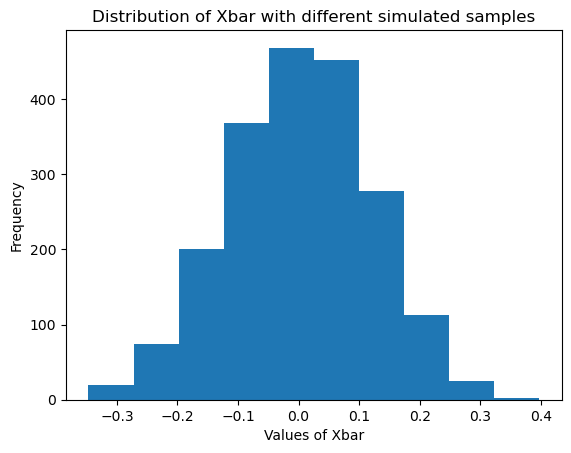

In [ ]:
# We will draw random sample "num_simulations" times
# Each time we will create a random vector of size "sample_size"
# In this example we will generate values from a uniform between -2 and 2.

num_simulations = 2000
sample_size     = 100

vec_xbar = [None] * num_simulations

for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()

vec_xbar

plt.hist(vec_xbar)
plt.title("Distribution of Xbar with different simulated samples")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()


## <span style="color:darkblue"> III. Nested Loops </span>

<font size = "5">

What happens to $\bar{X}$ with different $n$?

- The Central Limit Theorem makes a prediction!
- It says that the distribution will have a bell shape with higher $n$.

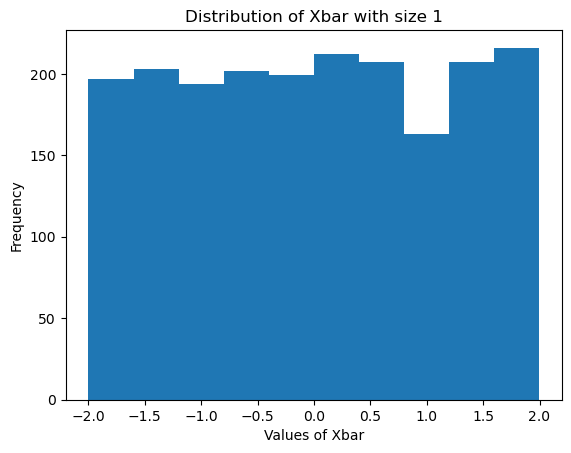

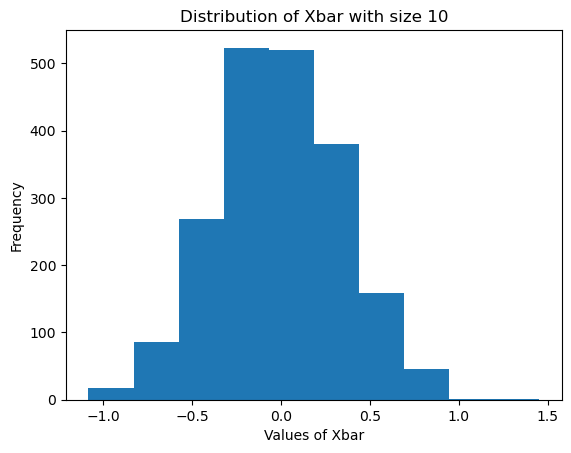

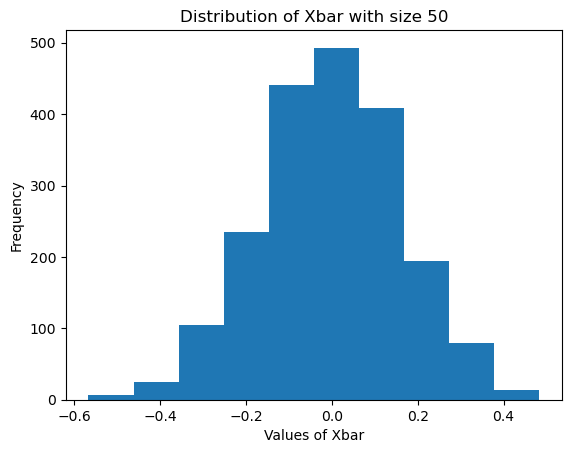

In [8]:
# One way is to write this with repeated code chunks
# We just repeat the code that we had above, with different sample sizes
# Each time will start the process of generating new data from scratch.

num_simulations = 2000

# Simulate with sample size one
sample_size = 1
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 1")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()

# Simulate with sample size 10
sample_size = 10
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 10")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()

# Simulate with sample size 50
sample_size = 50
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 50")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()



<font size = "5">
Nested Loops

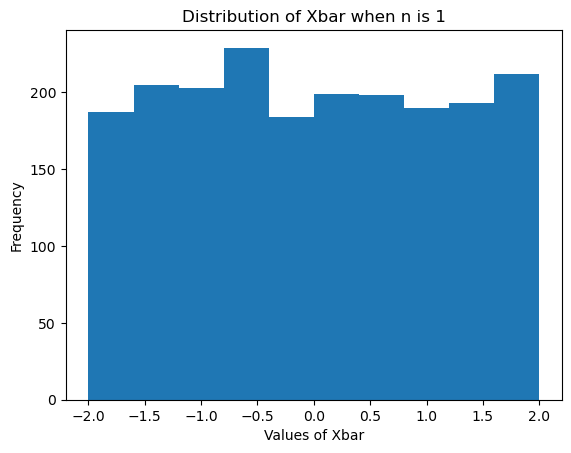

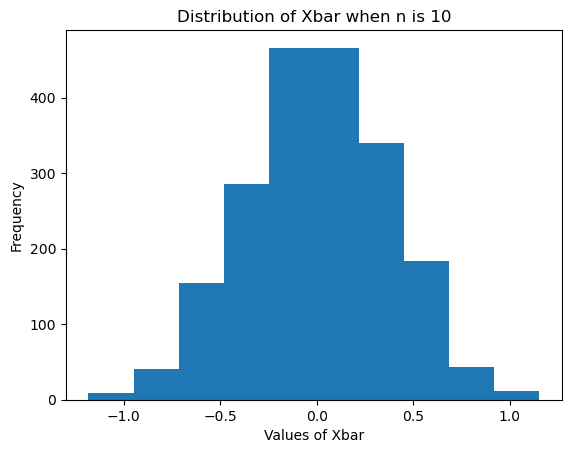

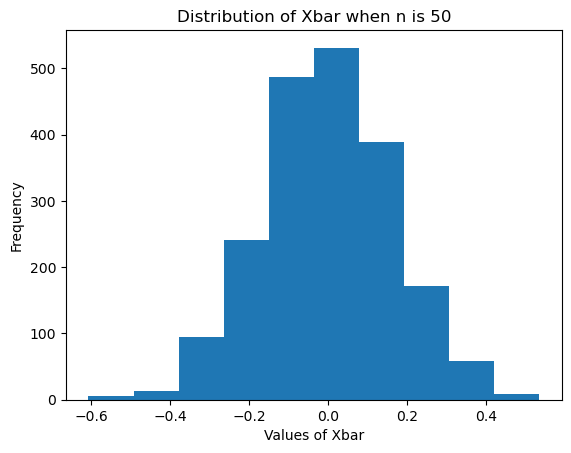

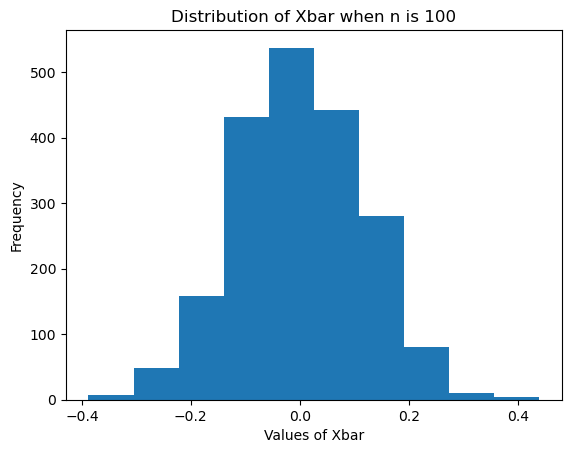

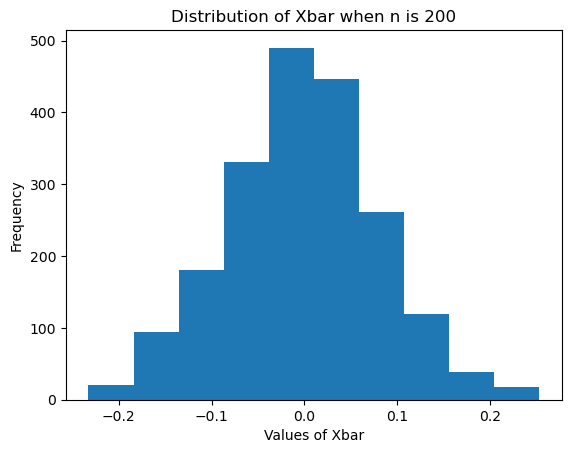

In [ ]:
# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

num_simulations = 2000
sample_size_list = [1,10,50,100,200]

for sample_size in sample_size_list:

    # The following command a vector null values, of length "num_simulations"
    vec_xbar = [None] * num_simulations
    
    for iteration in range(num_simulations):
            vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
            vec_xbar[iteration] = vec_unif.mean()
    plt.hist(vec_xbar)
    plt.title("Distribution of Xbar when n is " + str(sample_size))
    plt.ylabel("Frequency")
    plt.xlabel("Values of Xbar")
    plt.show()

    
    

<font size = "5">
Try it yourself!

- Repeat the above simulation with a few changes
- Use a Chi-square distribution with (df = 1) instead of a normal

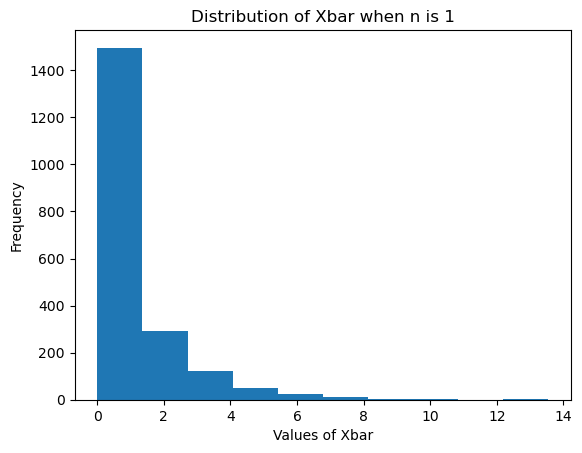

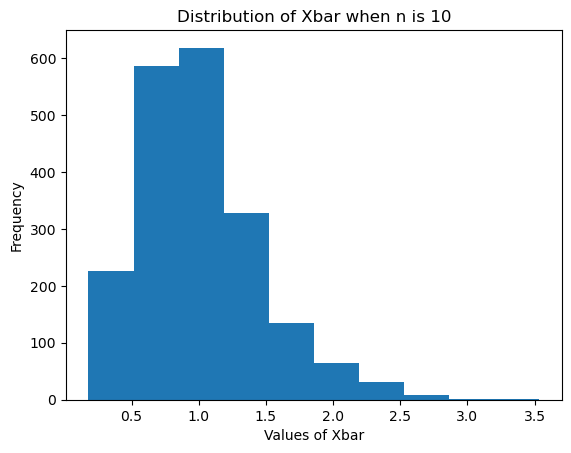

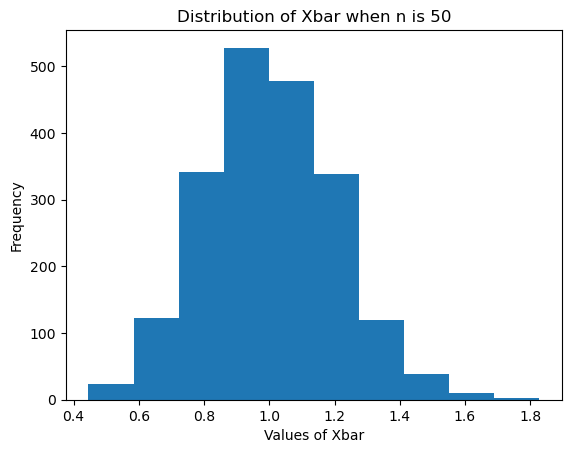

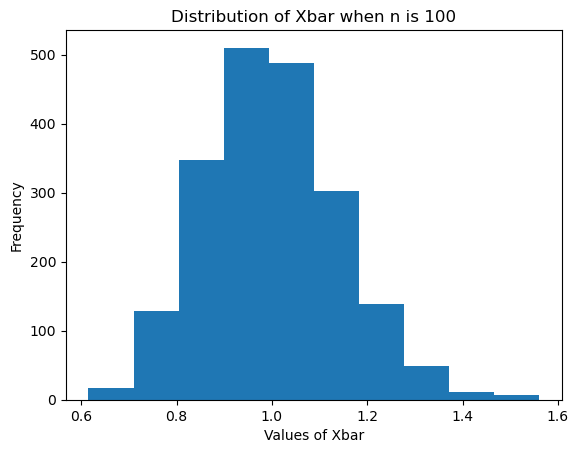

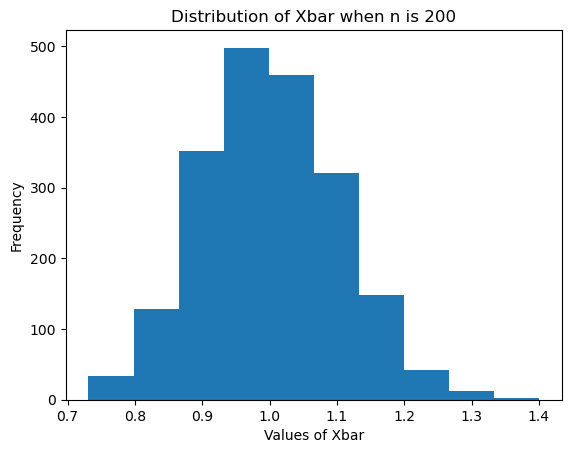

In [9]:

# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

num_simulations = 2000
sample_size_list = [1,10,50,100,200]

for sample_size in sample_size_list:

    # The following command a vector null values, of length "num_simulations"
    vec_xbar = [None] * num_simulations
    
    for iteration in range(num_simulations):
            vec_chisqr  = np.random.chisquare(df = 1, size = sample_size)
            vec_xbar[iteration] = vec_chisqr.mean()
    plt.hist(vec_xbar)
    plt.title("Distribution of Xbar when n is " + str(sample_size))
    plt.ylabel("Frequency")
    plt.xlabel("Values of Xbar")
    plt.show()






<font size = "5">

Try it yourself!

- Write code that puts all the figures in the same row

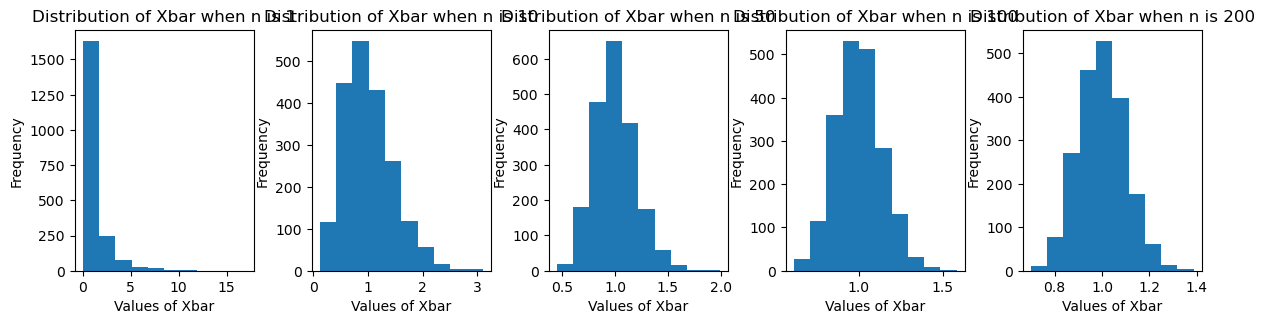

In [ ]:
# Write your own solution



# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

num_simulations = 2000
sample_size_list = [1,10,50,100,200]

fig, list_subfig = plt.subplots(1,len(sample_size_list),figsize = [12,3])
plt.tight_layout()

index = 0
for sample_size in sample_size_list:

    # The following command a vector null values, of length "num_simulations"
    vec_xbar = [None] * num_simulations
    
    for iteration in range(num_simulations):
            vec_chisqr  = np.random.chisquare(df = 1, size = sample_size)
            vec_xbar[iteration] = vec_chisqr.mean()
    list_subfig[index].hist(vec_xbar)
    list_subfig[index].set_title("Distribution of Xbar when n is " + str(sample_size))
    list_subfig[index].set_ylabel("Frequency")
    list_subfig[index].set_xlabel("Values of Xbar")
    index = index + 1


## <span style="color:darkblue"> IV. (Optional) Loops + If/else </span>

<font size = "5">

The proportion of "True" statements in a boolean list

In [ ]:
# Define a list with True/False values
list_boolean = [True,False,True,False,False]
np.mean(list_boolean)


0.4

<font size = "5">

Let "sample_stdv" be the sample standard deviation of $X_i$.




In [ ]:
# Parameters of a normal random variable
n                 = 10000
population_mean   = 2
population_stdv   = 5

# Create random variable and produce summary statistics
X           = np.random.normal(loc = 2,scale = 5,size = n)
Xbar        = X.mean()
sample_stdv = X.std()

# Check that the sample and standard deviation are close to their
# population values
print(Xbar)
print(sample_stdv)


2.0223826926859285
5.016563134723661


<font size = "5">

A 95\% normal confidence interval is defined by $\ldots$

- lower_bound = $\bar{X} -1.96 \times  \frac{\text{sample\_stdv}}{\sqrt{n}}$.
- upper_bound = $\bar{X} + 1.96 \times \frac{\text{sample\_stdv}}{\sqrt{n}}$.

In [ ]:
# Compute new variables for the upper and lower bound

lower_bound = Xbar - 1.96*(sample_stdv / np.sqrt(n))
upper_bound = Xbar + 1.96*(sample_stdv / np.sqrt(n))


<font size = "5">
Try it yourself! Write an if/else that checks whether <br>

lower_bound $\quad \le \quad $ population_mean $\quad \le \quad$ upper_bound


In [ ]:
# Write your own code

test_confidenceinterval = (lower_bound <= population_mean) & (population_mean <= upper_bound)


print(test_confidenceinterval)

True


<font size ="5">

Try it yourself! Test whether this is a 95% confidence interval



<font size = "3">

Procedure:
- Create a variable called "num_simulations" with value 1000
- Create the simulation parameters "n", "population_mean", "populations_stdv".
- Create an empty vector called "list_test_confidenceinterval".
- Create a loop. At each iteration:

    - Create a vector of normal random variables of size "n".
    - Create a variable "test_confidenceinterval", which tests:
    
        lower_bound $\quad \le \quad $ population_mean $\quad \le \quad$ upper_bound
    - Append "test_confidenceinterval" to the above list
    
- Compute the mean of "list_test_confidenceinterval"

Note: The final result should be close to 95%.



In [ ]:
# Write your own  code:

num_simulations = 1000
n                 = 10000
population_mean   = 2
population_stdv   = 5

list_test_confidenceinterval = []

for iteration in range(n):
    vec_x = np.random.normal(loc = population_mean, scale = population_stdv, size = n)
    Xbar        = vec_x.mean()
    sample_stdv = vec_x.std()
    lower_bound = Xbar - 1.96*(sample_stdv / np.sqrt(n))
    upper_bound = Xbar + 1.96*(sample_stdv / np.sqrt(n))
    test_confidenceinterval = (lower_bound <= population_mean) & (population_mean <= upper_bound)
    list_test_confidenceinterval.append((test_confidenceinterval))

# Compute the mean of list_confidence_interval
# This produce the percentage of times that the population_mean
# was contained in the interval
#
# Note: This should be approximately equal to 95%
np.mean(list_test_confidenceinterval)




0.9507